### Programming for Psychologists (2025/2026)
# Home Assignment: Visualizing Neurosynth Meta-Analysis Data for “Decision Making”
Course coordination: Matthias Nau\
Student: Luca Celine Ruthe\
Date: Nov 30, 2025

Link to the Neurosynth page of my concept "Decision making": [MRI Data](https://neurosynth.org/analyses/terms/decision%20making/)


Before starting Step 3, I completed Step 1 (downloading the anatomical and functional MRI files) and Step 2 (setting up a conda environment with all required packages).

**Step 3.2 - Locating MRI data automatically**

In this step, I locate the MRI data files automatically by searching the folder that contains this notebook.
Instead of hardcoding absolute file paths, I use a relative approach with wildcard matching to find all files with the **`.nii extension`.**
This makes the code more flexible and reproducible: it will work on any computer as long as the notebook and the MRI files are stored in the same directory.

I also print the detected filenames to verify that both the anatomical file and the functional file were found correctly.

In [41]:
# import libaries 
import glob # allows us to search for files by extension
import os

# show current working directory for verification
os.getcwd()


# Find all NIFTI files in the current folder
nii_files = glob.glob("*.nii")

print(nii_files)

['anatomical.nii', 'decision making_uniformity-test_z_FDR_0.01.nii']


**Step 3.3 - Visualize the functional data on top of the anatomical scan**

Now I would like to visualize the functional data on top of the anatomical scan **using Nilearn's `plot_stat_map` function** ([function documentation](https://nilearn.github.io/dev/modules/generated/nilearn.plotting.plot_stat_map.html)).

I first import the required libraries and create two variables, `anatomical_file` and `functional_file`, which store the filenames of the MRI data I located in the previous step.

Next, I load both files using `Nibabel` and visualize the functional map on the anatomical background.

After that, I customize my figures:
- add a descriptive title
- pick a new colormap
- set the voxel threshold to 0.1 
- choose cut coordinates (cut_coords=(X,Y,Z))


To select appropriate `cut_coords`, I first generated a basic visualization of the functional map without specifying coordinates. From this initial plot, I visually inspected where the strongest activations were located. Based on these regions, I chose coordinates that place the slices through areas with the clearest or strongest activation patterns. This ensures that the functional activity is well centered and easy to interpret in the final visualization.

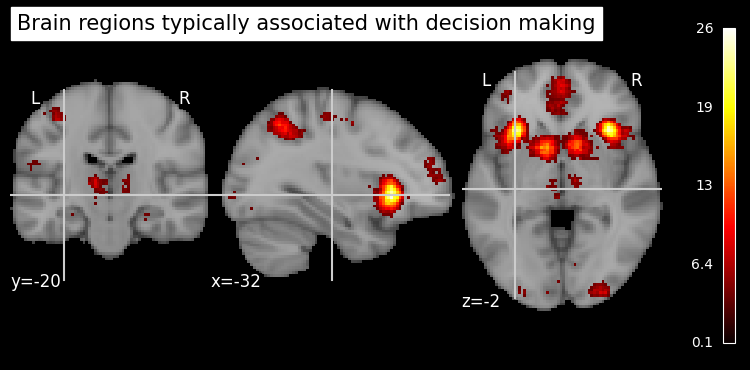

In [40]:
# import needed libraries
import nibabel as nib # for loading the NIFTI files
import nilearn.plotting # for plotting

# create two variables for the two files (filenames from Step 3.2)
anatomical_file = "anatomical.nii"
functional_file = "decision making_uniformity-test_z_FDR_0.01.nii"

# load MRI images
anat_img = nib.load(anatomical_file)
func_img = nib.load(functional_file)

# use function for visualization and then add customization after 
nilearn.plotting.plot_stat_map(
    func_img,
    bg_img=anat_img,
    title="Brain regions typically associated with decision making",
    cmap="hot",
    threshold=0.1,
    cut_coords=(-32, -20, -2) 
)
nilearn.plotting.show()




**Step 3.4 - Plot a histogram of the values in the functional data file**

In this step, I extract the voxel values from the functional MRI file and visualize their distribution in a histogram. A functional NIfTI file contains a 3D array of voxel intensities. Each voxel value reflects how strongly that location in the brain is associated with my chosen concept **- decision making -** in the Neurosynth meta-analysis.

I load the functional file using NiBabel, which gives access to the raw voxel data as a NumPy array (func_img.get_fdata()). Because I am interested only in meaningful activation values, I select positive voxel intensities (values > 0), as instructed in the assignment. Indexing with data[data > 0] automatically extracts all positive values from the 3D dataset into a 1-dimensional array suitable for plotting.

The histogram shows how these positive activation values are distributed across the brain. To make the plot clear and informative, I add a title, axis labels, and choose a color for the bars.

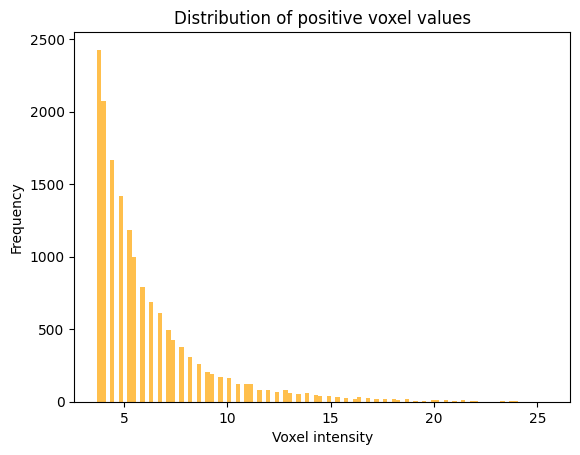

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# load the functional data file with nibabel
func_img = nib.load(functional_file)

# get the raw voxel data as a numpy array
# get_fdata() converts the image into a 3D NumPy array
data = func_img.get_fdata()

# select only positive values
# Using data[data > 0] selects only positive voxel intensities
positive_values = data[data > 0]

# plot the histogram
plt.hist(positive_values, bins="auto", color="orange", alpha=0.7)

# customize the figure
plt.title("Distribution of positive voxel values")
plt.xlabel("Voxel intensity")
plt.ylabel("Frequency")

plt.show()